![OMNIS2_Logo_projektu.png](../figures/OMNIS2_Logo_projektu.png)

# Ćwiczenie 18: Rekurencja

autor: Maciej Przybylski

Rekurencyjne wywołanie funkcji (w skrócie **rekurencja**) oznacza wywołanie funkcji przez samą siebie. 

W C++ schemat typowej funkcji rekurencyjnej będzie wyglądał następującą:
```c++
typ_funkcji nazwaFunkcji(parametry)
{
    // 1. Warunek stopu (zazwyczaj zależny od parametrów funkcji)
    if (warunek_stopu) {
        return wartość_bazowa;
    }
    
    // 2. Krok rekurencyjny (modyfikacja parametrów może być niezbędna do zajścia warunku stopu)
    return nazwaFunkcji(zmodyfikowane_parametry);
}
```

**Dla poprawnej implementacji funkcji rekurencyjnej kluczowe są:**

1. Co najmniej jedno wywołanie samej siebie (przez funkcję rekurencyjną).
2. Warunek stopu, dla którego nastąpi przerwanie wywoływanie samej siebie (tak samo jak ma to miejsce przy pętlach).

**Natomiast poniższe elementy są opcjonalne:**

1. Funkcja nie musi zwracać żadnego elementu (może być typu `void`).
2. Funkcja nie musi mieć parametrów, ale wewnątrz musi być jakaś instrukcja (np. wczytanie wartości z konsoli), która daje szansę na zajście warunku stopu.
3. Warunek stopu może wystąpić przed albo po kroku rekurencyjnym, w zależności od tego jaki efekt chcemy uzyskać.
4. Funkcja rekurencyjne może zawierać wiele wywołań rekurencyjnych samej siebie.

## Przygotowanie notatnika

Kod w poniższej komórce ładuje biblioteki używane w tym ćwiczeniu

In [ ]:
#include <iostream>
#include <ctime>
using namespace std;

## Przykłady rekurencji

### Przykład: Silnia

Silnia jest dobrym przykładem funkcji matematycznej, która z definicji jest rekurencyjna:

$n! =  \begin{cases}  1 & \text{jeśli } n = 0 \\ n \cdot (n-1)! & \text{jeśli } n > 0  \end{cases}$

In [ ]:
int silnia(int n) {
    // Warunek stopu
    if (n == 0 ) 
    {
        return 1;
    }
    
    // Krok rekurencyjny: n! = n * (n-1)!
    return n * silnia(n - 1);
}

In [ ]:
int x = 5;
cout << "Silnia z " << x << " wynosi " << silnia(x);

### Zadanie 18.1

Bazując na implementacji funkcji `silnia` spróbuj zaimplementować rekurencyjną funkcję postaci:

$suma(x) =  \begin{cases}  0 & \text{jeśli } x = 0 \\ x + suma(x-1) & \text{jeśli } x > 0  \end{cases}$

In [ ]:
?? suma( ?? x)
{
  //TODO: zaimplementuj funkcję rekurencyjnie
}

W komórce poniżej przetestuj `suma(10)`:

In [ ]:
// TODO: przetestuj funkcję suma

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
int suma(int x) {
    if (x == 0 ) 
        return 0;
    
    return x + suma(x - 1);
}
```
</details>

### Przykład: Wczytanie litery ze sprawdzeniem

Poniżej pokazana jest implementacja funkcji wczytująca znaki tak długo dopóki użytkownik nie poda litery (małej lub dużej). 

In [ ]:
char wczytajLitere()
{
    cout << "Podaję literę: ";
    char c;
    cin >> c;

    if(isalpha(c)) // isalpha to gotowa funkcja, która sprawdza czy znak jest literą (małą lub dużą)
        return c;

    return wczytajLitere();
}

In [ ]:
char litera =  wczytajLitere();
cout << "Podana litera to " << litera;

##  Rekurencja a stos

Przypomnijmy, że program napisany w C++ ma dostęp do dwóch obszarów pamięci: **stosu** o stałym (niedużym) rozmiarze i **sterty** na której pamięć alokujemy dynamicznie. 

**Na stosie** umieszczane są wszystkie zmienne oraz parametry funkcji. Co oznacza, że przy rekurencyjnym wywołaniu funkcji, kolejne poziomy wywołania umieszczają w pamięci swoje parametry i zmienne lokalne. Ma to swoje zalety i wady. 

### Przykład: wypisanie w odwrotnej kolejności liczb podanych przez użytkownika

Funkcja w tym przykładzie wczytuje od użytkownika kolejne liczby, aż do momentu kiedy użytkownik poda liczbę mniejszą lub równą 0.

> Zwróć uwagę w jakiej kolejności następuje wypisanie liczby i krok rekurencyjny. 

In [ ]:
void wypiszOdKonca()
{
    int x;
    cout << "Podaj liczbę: ";
    cin >> x;

    if(x<=0)
        return;

    wypiszOdKonca();  // najpierw rozwijamy rekurencję, a każde wywołanie ma własne (lokalne) zmienne x odłożone na stosie
    
    cout << x << " "; // wypisanie następuje dopiero podczas "zwijania się" się rekurencji (po zajściu warunku stopu)
}

In [ ]:
wypiszOdKonca();

Zazwyczaj w funkcjach rekurencyjnych można wyróżnić **dwie fazy**: _zagłębianie się_ (rozwijanie się) stosu wywołań oraz _zwijanie się_ stosu wywołań po wystąpieniu warunku końca. 

W funkcji `wypiszOdKonca()` zbieranie danych od użytkownika następuje przed wywołaniem rekurencyjnym, a wartości `x` są zapamiętywane na stosie. Z kolei, wypisanie następuje dopiero w fazie zwijania się rekurencji. 

**Sposób w jaki następuje zapełnianie stosu w wywołaniu rekurencyjnym funkcji warto prześledzić w PythonTutor: [kliknij](https://pythontutor.com/render.html#code=%23include%20%3Ciostream%3E%0Ausing%20namespace%20std%3B%0A%0Avoid%20odliczOdZeraDo%28int%20a%29%0A%7B%0A%20%20if%28a%3E0%29%0A%20%20%20%20odliczOdZeraDo%28a-1%29%3B%0A%20%20%20%20%0A%20%20cout%20%3C%3C%20a%20%3C%3C%20endl%3B%0A%7D%0A%0Aint%20main%28%29%20%0A%7B%0A%20%20odliczOdZeraDo%283%29%3B%0A%20%20return%200%3B%0A%7D&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=cpp_g%2B%2B9.3.0&rawInputLstJSON=%5B%5D&textReferences=false)**

W przykładowej funkcji `odliczOdZeraDo` samo odliczanie (wartość zmiennej `a`) odbywa się w kierunku malejącym poprzez wywołanie rekurencyjne z wartością o jeden mniejszą. Natomiast **wypisanie zachodzi dopiero przy zwijaniu się rekurencji**.

![figure](tutor-odliczOdZeraDoX.png)

### _Stack overflow_ czyli przepełnienie stosu

Niestety Stos ma stały i niewielki rozmiar (pojedyncze megabajty) i łatwo go przepełnić. 

#### Przykład przepełnienia stosu

W przykładzie mamy zsumować elementy w tablicy dynamicznej liczb całkowitych o rozmiarze miliona elementów.

Poniżej jest kod, który alokuje pamięć i wypełnia tablicę losowymi liczbami 0 lub 1.

In [ ]:
int n = 1000000;
int *T = new int[n];
for(int i=0; i<n; ++i) T[i] = rand()%2;

Najpierw napiszemy funkcję sumującą w wersji iteracyjnej, czyli takiej, która używa pętli. 

In [ ]:
int sumujIteracyjnie(int *T, int n)
{
    int suma = 0;

    for(int i=0; i<n; ++i) 
        suma += T[i];

    return suma;
}

Sprawdźmy jej działanie:

In [ ]:
int a = sumujIteracyjnie(T,n);
cout << a << endl;

A teraz napiszemy funkcję sumującą w wersji rekurencyjnej... 

In [ ]:
int sumujRekurencyjnie(int *T, int n)
{
    if(n<0)
        return 0;

    return sumujRekurencyjnie(T, n-1) + T[n-1];
}

... i sprawdzamy jej działanie.

In [ ]:
int a = sumujRekurencyjnie(T,n);
cout << a << endl;

Próba uruchomienia tej funkcji dla miliona elementów powoduje awaryjne zakończenie działania kernela w Jupyterze ze względu na przepełnienie stosu. 

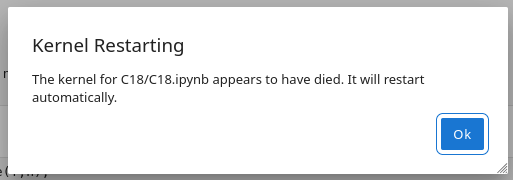

### Rekurencja ogonowa

Istnieje specjalny typ rekurencji, tak zwana **rekurencja ogonowa**, która **nie powoduje przepełnienia stosu.**

Zasada tworzenia rekurencji ogonowej jest prosta: **wywołanie rekurencyjne musi być ostatnią instrukcją w funkcji**.

Ponieważ wywołanie rekurencyjne jest ostatnią instrukcją w funkcji, to nie ma potrzeby przechowywania lokalnych zmiennych i parametrów funkcji, a więc w pamięci użyta jest tylko pamięć na aktualne wywołanie funkcji.


W przykładzie poniżej wczytywane są liczby dopóki użytkownik nie poda liczby parzystej.

In [ ]:
#include <iostream>
using namespace std;

In [ ]:
int wczytajParzysta()
{
    int x;
    cin >> x;
    if (x%2 == 0 ) 
        return x;
    
    return wczytajParzysta();
}

In [ ]:
int x =  wczytajParzysta();
cout << "Wczytano: " << x;

Charakterystyczne dla rekurencji ogonowej jest to, że łatwo jest ją zastąpić wersją iteracyjną, czyli z pętlą.

In [ ]:
int wczytajParzystaWPetli()
{
    int x;
    cin >> x;
    while(x%2 != 0 ) 
        cin >> x;
    
    return x;
}

In [ ]:
int x =  wczytajParzystaWPetli();
cout << "Wczytano: " << x;

Niestety, **kernel w Jupyterze nie wspiera rekurencji ogonowej**. Aby w pełni uzyskać efekt rekurencji ogonowej nieprzepełniającej stosu należy skompilować program z opcją optymalizacji. 

Zrobimy to w środowisku QtCreator, w którym należy uruchomić poniższy kod. W programie znajduje się funkcja, która rekurencyjnie wypełnia tablicę losowymi liczbami 0 i 1, a na koniec zwraca sumę elementów tablicy. **Funkcja ma dwa rodzaje wywołania rekurencyjnego, jedno jest rekurencją ogonową a drugie nie**. 
Jednak zanim przetestujemy obie wersje należy włączyć kompilację z opcją optymalizacji czyli `Release` (w QtCreator domyślnie jest włączona opcja `Debug`), co robimy jak na rysunku poniżej:

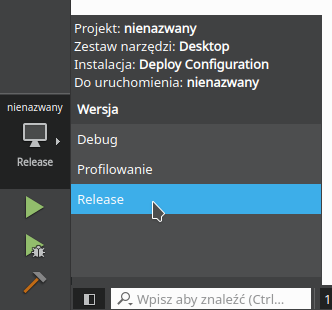


```c++
#include <iostream>
#include <cstdlib>
#include <ctime>
using namespace std;

int wypelnijSumuj(int *T, int n)
{
    if(n==0)
        return 0;

    T[n-1] = rand()%2;

    return T[n-1] + wypelnijSumuj(T, n-1);  // Rekurencja ogonowa
//    return wypelnijSumuj(T, n-1) + T[n-1]; // Rekurencja zwykła
}

int main()
{
    int n = 1000000;
    int *T = new int[n];
    int a = wypelnijSumuj(T,n);

    cout << a << endl;

    delete [] T;

    return 0;
}
```

**Najpierw przetestuj rekurencję ogonową**, a następnie zakomentuj ją i odkomentuj rekurencję zwykłą.

**Czy przy zwykłej rekurencji pojawił się wynik na konsoli?** Najpewniej nie, bo zwykła rekurencja przepełniła stos i program się zatrzymał.

## Zadania do samodzielnego wykonania

### Zadanie 18.2

Napisz funkcję rekurencyjną wyszukującą największy znak w tablicy jednowymiarowej podanej jako argument. 

In [ ]:
char najwiekszy(char T[], int i)
{
    // Implementacja do uzupełnienia
}

In [ ]:
// Testowanie kodu
const int N = 5;
char T[] = {'r', 'w', 'j', 'U', '5'};

cout << najwiekszy(T,N-1);

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
char najwiekszy(char T[], int i)
{
    if(i>0)
    {
        char naj = najwiekszy(T,i-1);
        if(naj > T[i])
            return naj;
        return T[i];
    }
    return T[i];
}
```
</details>

### Zadanie 18.3

Daną listę dynamiczną jednokierunkową zawierającą kolejne litery alfabetu wypisz rekurencyjnie: 
1. od początku do końca
2. od końca do początku.

In [ ]:
struct Znaki{
    char z;
    Znaki* n;
};

In [ ]:
//Implementacja funkcji wypiszOdPoczatku
void wypiszOdPoczatku(???)
{
    
}

In [ ]:
//Implementacja funkcji wypiszOdKonca
void wypiszOdKonca(???)
{
    
}

In [ ]:
// Testowanie funkcji
Znaki* g = nullptr;
Znaki* o = nullptr;

// Wstawianie kolejnych liter do listy
for(int i=0; i<5; i++)
{
    Znaki* nowy = new Znaki;
    nowy->z = 'a'+i;
    nowy->n = nullptr;
    if(g==nullptr)
        g = nowy;
    else
        o->n = nowy;
    o = nowy;
}

wypiszOdPoczatku(g);
cout << endl;
wypiszOdKonca(g);

while(g)
{
    Znaki* p = g;
    g = g->n;
    delete p;
}

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
void wypiszOdPoczatku(Znaki *p)
{
    if(p)
    {
        cout << p->z << endl;
        wypiszOdPoczatku(p->n);
    }
}

void wypiszOdKonca(Znaki *p)
{
    if(p)
    {
        wypiszOdKonca(p->n);
        cout << p->z << endl;
    }
}
```
</details>

![logotypy.png](../figures/OMNIS2_logotypy.png)

Niniejsze materiały są objęte licencją <a href="https://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">